In [1]:
import imutils
import cv2

In [2]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread('hand_01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

In [3]:
# threshold the image, then perform a series of erosions + dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations = 2)
thresh = cv2.dilate(thresh, None, iterations = 2)

In [4]:
# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key = cv2.contourArea)

In [5]:
# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

In [6]:
# draw the outline of the object
# then draw each of the extreme points, where the left-most is red, right-most is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)

array([[[ 41,  44,  42],
        [ 41,  44,  42],
        [ 41,  44,  42],
        ...,
        [ 21,  26,  25],
        [ 22,  27,  25],
        [ 22,  27,  25]],

       [[ 36,  39,  37],
        [ 37,  40,  38],
        [ 38,  41,  39],
        ...,
        [ 21,  26,  25],
        [ 22,  27,  25],
        [ 22,  27,  25]],

       [[ 37,  40,  38],
        [ 38,  41,  39],
        [ 39,  42,  40],
        ...,
        [ 21,  26,  25],
        [ 22,  27,  25],
        [ 22,  27,  25]],

       ...,

       [[ 43,  47,  42],
        [ 40,  44,  39],
        [ 39,  43,  38],
        ...,
        [185, 193, 176],
        [187, 197, 181],
        [187, 197, 181]],

       [[ 62,  66,  61],
        [ 59,  63,  58],
        [ 59,  63,  58],
        ...,
        [186, 195, 175],
        [194, 206, 184],
        [194, 206, 184]],

       [[ 44,  48,  43],
        [ 45,  49,  44],
        [ 53,  57,  52],
        ...,
        [187, 196, 175],
        [187, 200, 174],
        [187, 200, 174]]

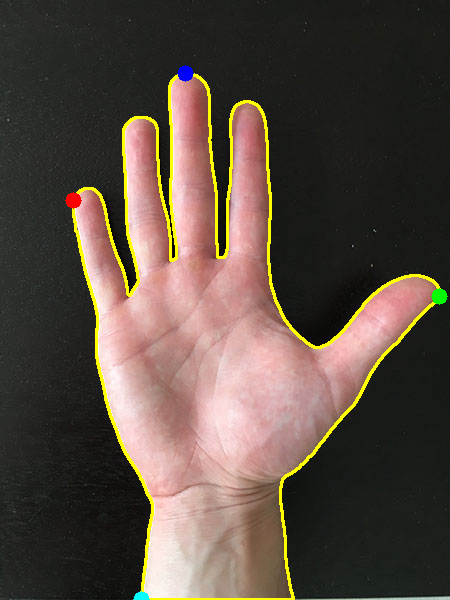

-1

In [10]:
# show the output image
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)